In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [7]:
house_raw_data = pd.read_csv('house_data.csv')
house_raw_data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


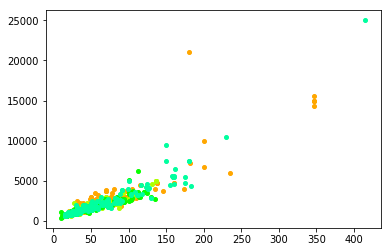

In [11]:
cmap = get_cmap(10)
for arr in range(1,10):
    plt.plot(house_data[house_data['arrondissement']==arr]['surface'],house_data[house_data['arrondissement']==arr]['price'],'ro',markersize=4,c=cmap(arr))
plt.show()

In [15]:
house_data = house_raw_data[house_raw_data['surface']<250]
house_data = house_data[house_data['price']<12000]

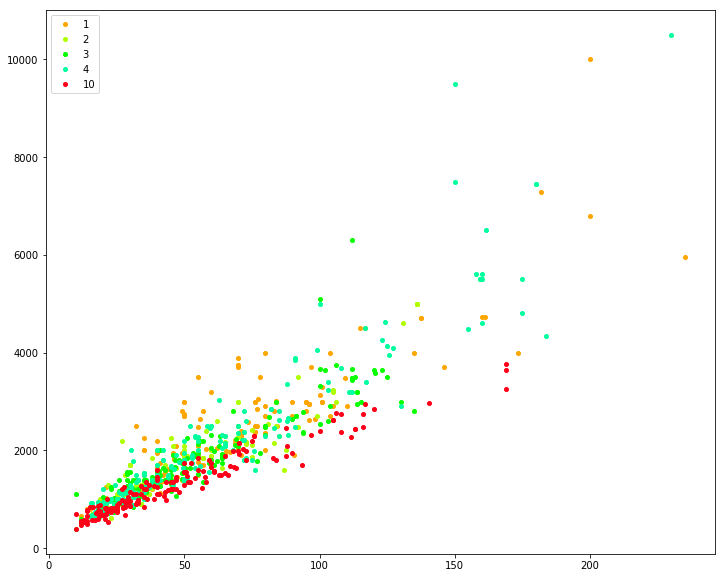

In [34]:
plt.rcParams["figure.figsize"] = [12.0,10.0]
cmap = get_cmap(10)
for arr in range(1,11):
    if len(house_data[house_data['arrondissement']==arr])>0:
        plt.plot(house_data[house_data['arrondissement']==arr]['surface'],house_data[house_data['arrondissement']==arr]['price'],'ro',markersize=4,c=cmap(arr),label="%i" % arr)
plt.legend()
plt.show()

In [51]:
ones = np.ones(house_data.shape[0])
x = np.matrix([ones,house_data['arrondissement'],house_data['surface']]).T
y = house_data['price'].T

In [52]:
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [53]:
theta

matrix([[436.23892188, -49.23203046,  29.59605634]])

In [54]:
100 * theta.item(2) + 10 * theta.item(1) + theta.item(0)

2903.5242516220487

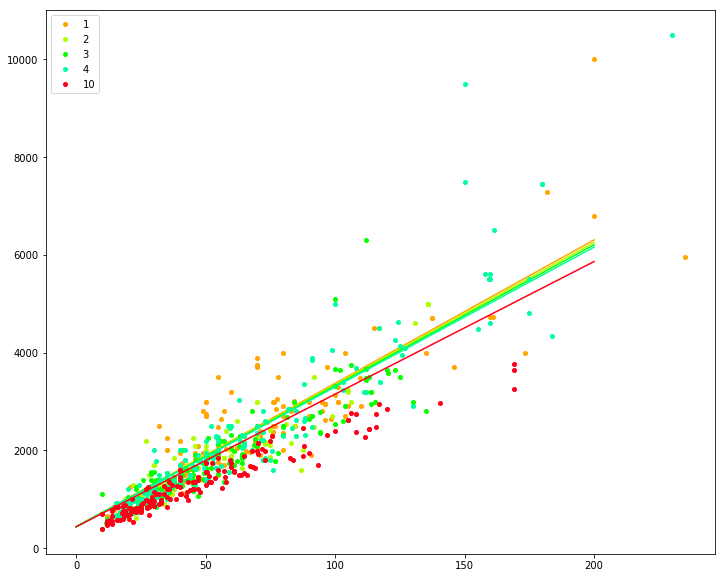

In [57]:
plt.rcParams["figure.figsize"] = [12.0,10.0]
cmap = get_cmap(10)
for arr in range(1,11):
    if len(house_data[house_data['arrondissement']==arr])>0:
        house_arr = house_data[house_data['arrondissement']==arr]
        plt.plot([0,200],[theta.item(0),200 * theta.item(2) + arr * theta.item(1) + theta.item(0)],c=cmap(arr))
        plt.plot(house_arr['surface'],house_arr['price'],'ro',markersize=4,c=cmap(arr),label="%i" % arr)
plt.legend()
plt.show()

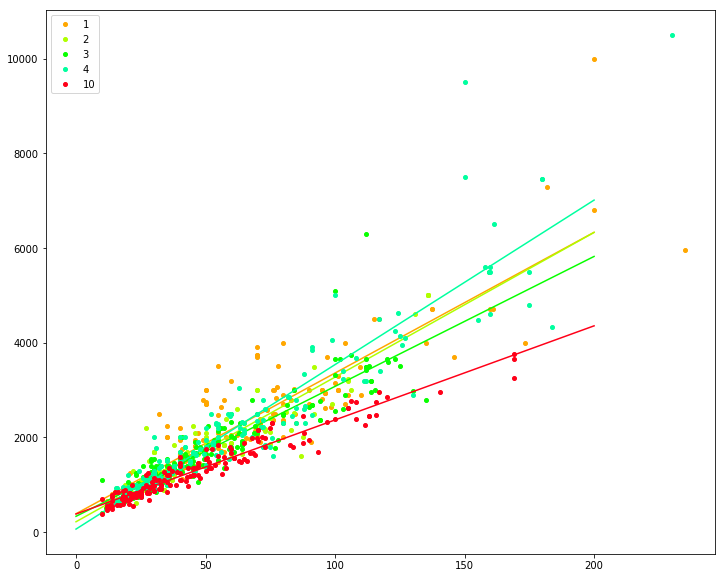

In [71]:


plt.rcParams["figure.figsize"] = [12.0,10.0]
cmap = get_cmap(10)
for arr in range(1,11):
    if len(house_data[house_data['arrondissement']==arr])>0:
        house_arr = house_data[house_data['arrondissement']==arr]
        ones = np.ones(house_arr.shape[0])
        x = np.matrix([ones,house_arr['surface']]).T
        y = house_arr['price'].T
        theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        plt.plot([0,200],[theta.item(0),200 * theta.item(1) + theta.item(0)],c=cmap(arr))
        plt.plot(house_arr['surface'],house_arr['price'],'ro',markersize=4,c=cmap(arr),label="%i" % arr)
plt.legend()
plt.show()

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

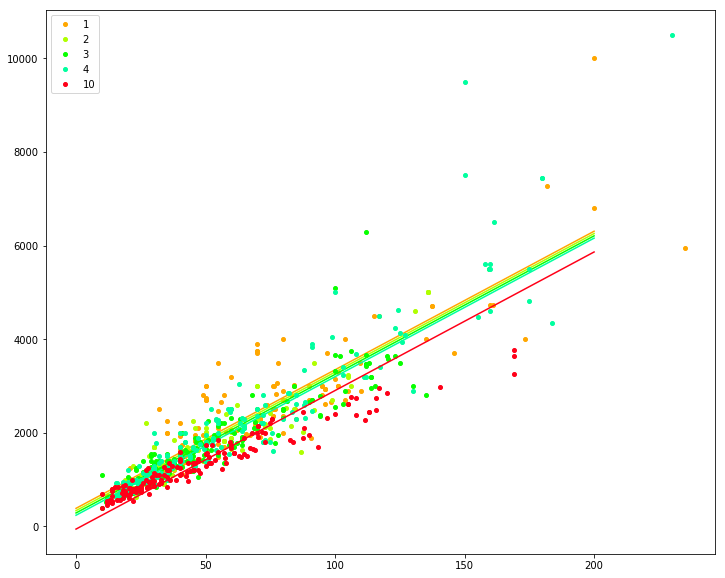

In [93]:
ones = np.ones(house_data.shape[0])
x = np.matrix([ones,house_data['arrondissement'],house_data['surface']]).T
y = house_data['price'].T
regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.rcParams["figure.figsize"] = [12.0,10.0]
cmap = get_cmap(10)
for arr in range(1,11):
    house_arr = house_data[house_data['arrondissement']==arr]
    if len(house_arr)>0:
        plt.plot([0,200],[regr.predict([[1,arr,0]]),regr.predict([[1,arr,200]])],c=cmap(arr))
        plt.plot(house_arr['surface'],house_arr['price'],'ro',markersize=4,c=cmap(arr),label="%i" % arr)
plt.legend()
plt.show()

In [88]:
regr.predict([[1,10,100]])

array([2903.52425162])